# Laboratorio 2 - Parte 1

### Modelos no paramétricos

### 2019-I

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [1]:
#Tomado de https://github.com/rramosp/mooc-grader
#from Autentication import *#python 3
#import inspect, urllib
#html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
#html


#### Primer integrante
Nombre: John David Gonzalez
CC. 1017204873

#### Segundo integrante
Nombre: Mateo Llano Avendaño
CC. 1045025062

In [1]:
from __future__ import division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1: Generar muestras

Genere un conjunto de 1000 muestras artificiales con una distribución que corresponda a la suma de dos Gaussiana con diferente media, ambas de una sola dimension. Grafique el histograma de los datos generados. (`plt.hist()`)

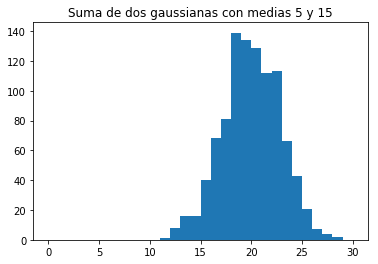

In [2]:
data = np.random.normal(5,2,1000)
data2 = np.random.normal(15,2,1000)
data = np.add(data, data2)
plt.hist(data, 30 ,(0,30))
plt.title("Suma de dos gaussianas con medias 5 y 15")
plt.show()

## Ejercicio 2: Contextualización del problema

Para el problema de regresion usaremos la misma base de datos del laboratorio anterior `AirQuality.data`. Esta es la base de datos del UCI Machine Learning Repository. En el siguiente URL se encuentra toda la descripción de la base de datos del problema http://archive.ics.uci.edu/ml/datasets/air+quality. Ejecute la siguiente celda para cargar los datos.

In [3]:
#Cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter


#X: Toma las primeras 5000 filas(muestras) y las columnas 0-11 (carácteristicas)
X = db[:5000,0:12]

#Y: Toma las primeras 5000 filas y la columna 12, corresponde a la salida de la regresión
Y = db[:5000,12]

Describa cómo esta construida la base de datos utilizada en el problema de regresión: 

2.1 ¿Cuántas muestras hay en total?:

In [42]:
print("El número de muestras que hay en total es de: ",np.size(X,0))

El número de muestras que hay en total es de:  5000


2.2 ¿Cuántas características tiene el problema?:

In [41]:
print("El número de características que contiene el problema es de: ",np.size(X,1))

El número de características que contiene el problema es de:  12


## Ejercicio 3: Completar código de K-Vecinos

Analice los siguientes métodos de la teoría vista para los modelos de *K-vecinos más cercanos (KNN)* y complete el código del método KNN.

<b>Nota</b>: Para el cáculo de la distancia entre vectores tienen dos opciones, usar la función la distancia euclidiana `scipy.spatial.distance.euclidean`([Ejemplo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html)) o usar la función `numpy.linalg.norm`([Ejemplo](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)). Revisen la documentación para comprender su uso. También serán de utilidad las funciones `numpy.sort` y `numpy.argsort`.


In [7]:
import scipy as sc
import operator

def calcularDistanciaEuclidiana(u,v):   
    return sc.spatial.distance.euclidean(u,v)
   

def KNN(X_train, Y_train, X_test, k, tipo):
    #X_train: Matriz con las muestras de entrenamiento
    #Y_train: Vector con los valores de salida pra cada una de las muestras de entrenamiento
   
    #X_val: Matriz con las muestras de validación
    #tipo: Bandera que indica si el problema es de regresión o de clasificación.
    tipo = tipo
   
    #Parámetro k que equivale al número de vecinos a tener en cuenta para resolver el problema de 
    #predicción de la variable de salida
    k = k 
    Nt = len(X_test)
    Y_test = np.zeros(Nt)
    XLen = len(X_train)
    distancias = np.zeros(XLen, dtype=float)
    
    for i in range (Nt):
        for j in range (XLen):
            distancias[j] = calcularDistanciaEuclidiana(X_test[i],X_train[j])
        a = np.argsort(distancias)
        suma = 0.0
        for j in range (k):
            indice = a[j]
            suma = suma + Y_train[indice]
        suma = suma/k
        Y_test[i] = suma   
        
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_test, en el mismo orden.  
    return Y_test 

## Ejercicio 4: Entrenamiento y pruebas

Una vez haya completado el codigo del método de KNN:
1. Ejecute varias veces el proceso de entrenamiento y validación cambiando el parametro  $k$ que corresponde al número de vecinos
2. Completar la tabla de resultados con el error MAPE y la desviación estándar.

In [8]:
"""
Mean Absolute Percentage Error para los problemas de regresión
"""
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 


"""
Calcular el error en clasificación
"""
def error(Y_lest, Y):
    
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error/np.size(Y)
    
    return error

In [27]:
from numpy import random,matlib
import math
from scipy import stats

def train(k = 1, tipo = True, h = -1):

    N = np.size(X,0)

    #Entrenamiento y validación del modelo
    random.seed(1)
    Error = np.zeros(2)
    valor = ""
    for j in range(2):
    
        ind=np.random.permutation(N)
        Xtrain = X[ind[0:int(math.ceil(0.7*N))],:]
        Xtest = X[ind[int(math.ceil(0.7*N)):N],:]
        Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
        Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Complete con el llamado apropiado de la función que Uds diseñaron 
        #(X_train, Y_train, X_val, k, tipo)
        if(h==-1):
            Yest = KNN(Xtrain, Ytrain, Xtest, k, tipo)
            valor = 'k=' + str(k)
        else:
            Yest = Nadaraya_Watson(Xtrain, Ytrain, Xtest, h)
            valor = 'h=' + str(h)

        #Evaluamos las predicciones del modelo con los datos de test
        Error[j] = MAPE(Yest,Ytest)
    
    mape = np.mean(Error)
    std = np.std(Error)

    print('\nError durante la prueba con ' + valor +': '+  str(mape) + '+-' + str(std))

Responda:

4.1 ¿Qué metodología de validación se usa en el experimento?

En el experimento se usa la metodología bootstrapping en donde se toma el  70% de los datos de entranamiento de manera aleatoria.

4.2 ¿Cuántas muestras se usan para el entrenamiento?

In [24]:
print("El número de muestras que se usan para el experimento son: ", np.size(X,0)*0.7)

El número de muestras que se usan para el experimento son:  3500.0


4.3 ¿Cuántas muestras se usan para la validación?

In [25]:
print("El número de muestras que se usan para el experimento son: ", np.size(X,0)*0.3)

El número de muestras que se usan para el experimento son:  1500.0


#### Tabla de resultados

In [28]:
train(k=1)
train(k=2)
train(k=3)
train(k=4)


Error durante la prueba con k=1: 0.3840372997747079+-0.016497301273993348

Error durante la prueba con k=2: 0.3630095013508765+-0.006140024361192514

Error durante la prueba con k=3: 0.3497424913566185+-0.0023601226154101596

Error durante la prueba con k=4: 0.34117124804036614+-0.004561202028195682


In [33]:
import pandas as pd
#!pip install qgrid
import qgrid

randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de vecinos' : pd.Series(['1', '2', '3', '4', '5', '6', '7', '100'])})
df_types["Error_Prueba"] = pd.Series(["0.3840","","0.3497","0.3411","0.3336","0.3252","0.3201","0.2687"])
df_types["Desviación estándar del error"] = pd.Series(["0.0164","","0.0023","0.0045","0.0027","0.0019","0.0007","0.0053"])
df_types.set_index(['Numero de vecinos'], inplace=True)
df_types["Error_Prueba"][1] = "0.3630"
df_types["Desviación estándar del error"][1] = "0.0061"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [29]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Numero de vecinos,,
1,0.3840,0.0164
2,0.3630,0.0061
3,0.3497,0.0023
4,0.3411,0.0045
5,0.3336,0.0027
6,0.3252,0.0019
7,0.3201,0.0007
100,0.2687,0.0053


## Ejercicio 5: Ventana de Parzen

Resolver el mismo problema de regresión, pero con el modelo de *Ventana de Parzen*. Se debe completar el código de la función <font color='blue'>Nadaraya-Watson</font>  Recuerde la función de densidad de probabilidad con la ventana de Parzen.
$$f({\bf{x}}^*) = \frac{1}{N h^d} \sum_{i=1}^{N} K(u_i), \;\; u_i = \frac{d({\bf{x}}^*,{\bf{x}}_i)}{h}$$


Nota: Los métodos `dist_euclidiana` y ECM continuan siendo válidos para el modelo ventana de Parzen.


In [ ]:
def kernel_gaussiano(x):
    return (np.exp((-0.5)*x**2))

def Nadaraya_Watson(X_train, Y_train, X_val, ancho_h):
    h = ancho_h    #Parámetro h que equivale al ancho de la ventana o kernel
    Nv = len(X_val)
    Y_val = np.zeros(Nv)
    d = np.size(X_train,1)
    N = np.size(X_train,0)
    a = 1/(N*(h**d))
    for i in range (Nv):
        numerador = 0.0
        denominador = 0.0
        for j in range (N):
            distancia = (calcularDistanciaEuclidiana(X_val[i],X_train[j]))/h
            
            funcion = kernel_gaussiano(distancia)
            numerador =  numerador + funcion*Y_train[j]
            denominador = denominador + funcion
            
        Y_val[i] = numerador/denominador
        
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.      
    return Y_val


## Ejercicio 6: Entrenamiento y pruebas

Una vez haya completado el codigo del método de Ventana de Parzen, ejecute varias veces el proceso de entrenamiento y validación cambiando el parametro $h$, que corresponde al ancho de la función kernel. Completar la siguiente tabla con los valores del error MAPE obtenidos y su desviación estándar:

#### Tabla de resultados

In [29]:
train(h=0.1)
train(h=0.9)
train(h=1)


Error durante la prueba con h=0.1: 0.3813005747268331+-0.01573114122573338

Error durante la prueba con h=0.9: 0.30111035388439256+-0.0031344056092405814

Error durante la prueba con h=1: 0.30522294039569675+-0.003159218224823318


In [39]:
train(h=2)
train(h=3)
train(h=5)
train(h=100)


Error durante la prueba con h=2: 0.30548058172252696+-0.003943068384557269

Error durante la prueba con h=3: 0.299316519656669+-0.004245154346174562

Error durante la prueba con h=5: 0.2644374071451173+-0.0033811170453101613

Error durante la prueba con h=100: 5.21524511154848+-0.24977191522405162


In [43]:
randn = np.random.randn
df_types2 = pd.DataFrame({
    'Ancho del kernel' : pd.Series(['0.1', '0.9', '1', '2', '3', '5', '10'])})
df_types2["Error_Prueba"] = ["0.3813", "", "03052", "0.3054", "0.2993", "0.2644", "5.2152"]
df_types2["Desviación estándar del error"] = ["0.0157", "", "0.0031", "0.0039", "0.0042", "0.0033", "0.2497"]
df_types2.set_index(['Ancho del kernel'], inplace=True)
df_types2["Error_Prueba"][1] = "0.3011"
df_types2["Desviación estándar del error"][1] = "0.0031"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types2, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [44]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Ancho del kernel,,
0.1,0.3813,0.0157
0.9,0.3011,0.0031
1,03052,0.0031
2,0.3054,0.0039
3,0.2993,0.0042
5,0.2644,0.0033
10,5.2152,0.2497


Responda:

6.1 Si intenta repetir la prueba anterior para un $h = 0.05$ el algoritmo falla. ¿Cuál es la causa de la falla?:

La razón por la que se presenta la falla al utilizar una ventana con un h = 0.05 es que esta genera un número, que es el resultado de la división de la distancia eucliadiana y el h, este número en algunos casos tiende a ser demasiado grande y al momento de pasar por la función kernel_Gaussiano, da como resultado cero, ocasionando una división por cero, generando un error.

A continuación, se muestra los resultados de calcular cada distancia con su respectivo resultado cuando pasa por la función kernel:

In [ ]:
train(h=0.05)

6.2 ¿Cómo evito que se presente la excepción?:

utilizando un h mas grande para evitar el conflicto que se presenta al hacer la division entre la distancia euclidiana y el h.